In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastai
import torch
from fastai.vision.all import *
from tqdm import tqdm
from torch.utils.data import dataloader
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

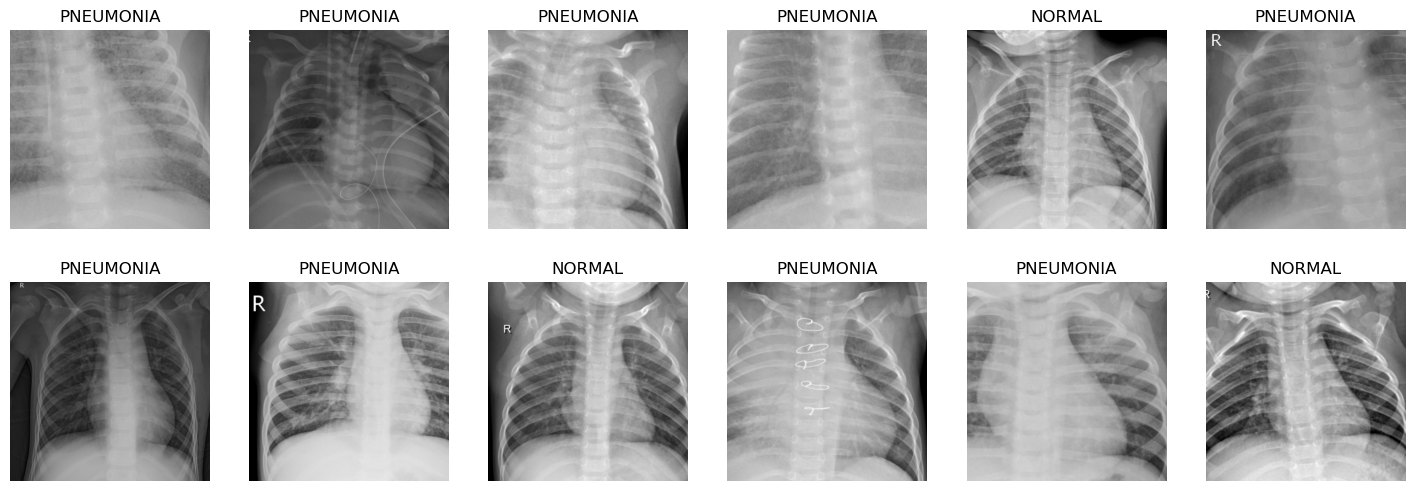

In [4]:
path = Path('/kaggle/input/pnevmoniya/train')
fls = get_image_files(path)
#failed = verify_images(path)
#failed

pnevmoniye_block = DataBlock(

    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 20),
    get_y = parent_label,
    item_tfms = Resize(440)
    
)

dls = pnevmoniye_block.dataloaders(path)

dls.train.show_batch(max_n = 12 , nrows = 2)

In [5]:
learn = cnn_learner(dls , resnet34 , metrics = accuracy)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

epoch,train_loss,valid_loss,accuracy,time
0,0.515489,0.147250,0.946309,02:28


epoch,train_loss,valid_loss,accuracy,time
0,0.120182,0.133740,0.969319,02:33
1,0.087417,0.122483,0.981783,02:31
2,0.053706,0.059075,0.986577,02:30
3,0.023539,0.049938,0.988495,02:29


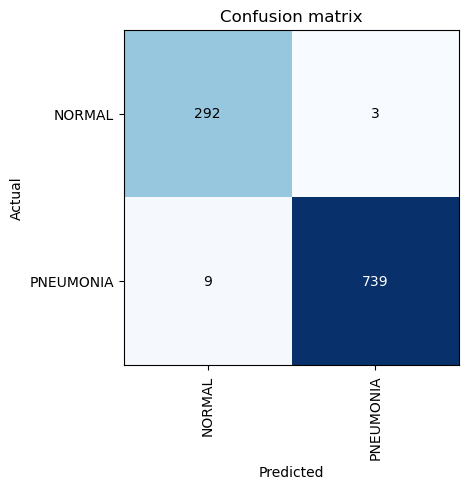

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
files = !ls "../input/pnevmoniya/test"
preds = []
numbers = []
for file in tqdm(files):
    num , pred_id , probs = learn.predict(f"../input/pnevmoniya/test//{file}")
    preds.append(pred_id)
    numbers.append(num)

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 1/624 [00:00<01:03,  9.75it/s]

  0%|          | 2/624 [00:00<01:14,  8.39it/s]

  1%|          | 4/624 [00:00<00:54, 11.38it/s]

  1%|          | 6/624 [00:00<00:58, 10.49it/s]

  1%|▏         | 8/624 [00:00<00:51, 11.87it/s]

  2%|▏         | 10/624 [00:00<00:50, 12.26it/s]

  2%|▏         | 12/624 [00:01<00:47, 12.85it/s]

  2%|▏         | 14/624 [00:01<00:45, 13.51it/s]

  3%|▎         | 16/624 [00:01<00:44, 13.76it/s]

  3%|▎         | 18/624 [00:01<00:44, 13.64it/s]

  3%|▎         | 20/624 [00:01<00:52, 11.41it/s]

  4%|▎         | 22/624 [00:01<00:49, 12.23it/s]

  4%|▍         | 24/624 [00:01<00:47, 12.58it/s]

  4%|▍         | 26/624 [00:02<00:44, 13.42it/s]

  4%|▍         | 28/624 [00:02<00:43, 13.64it/s]

  5%|▍         | 30/624 [00:02<00:43, 13.73it/s]

  5%|▌         | 32/624 [00:02<00:40, 14.58it/s]

  5%|▌         | 34/624 [00:02<00:39, 15.09it/s]

  6%|▌         | 36/624 [00:02<00:37, 15.69it/s]

  6%|▌         | 38/624 [00:02<00:38, 15.17it/s]

  6%|▋         | 40/624 [00:02<00:38, 15.03it/s]

  7%|▋         | 42/624 [00:03<00:43, 13.29it/s]

  7%|▋         | 44/624 [00:03<00:42, 13.55it/s]

  7%|▋         | 46/624 [00:03<00:41, 14.08it/s]

  8%|▊         | 48/624 [00:03<00:43, 13.18it/s]

  8%|▊         | 50/624 [00:03<00:43, 13.15it/s]

  8%|▊         | 52/624 [00:04<00:48, 11.75it/s]

  9%|▊         | 54/624 [00:04<00:51, 11.14it/s]

  9%|▉         | 56/624 [00:04<00:47, 12.06it/s]

  9%|▉         | 58/624 [00:04<00:48, 11.65it/s]

 10%|▉         | 60/624 [00:04<00:49, 11.33it/s]

 10%|▉         | 62/624 [00:04<00:45, 12.24it/s]

 10%|█         | 64/624 [00:04<00:43, 12.81it/s]

 11%|█         | 66/624 [00:05<00:42, 13.17it/s]

 11%|█         | 68/624 [00:05<00:40, 13.58it/s]

 11%|█         | 70/624 [00:05<00:43, 12.67it/s]

 12%|█▏        | 72/624 [00:05<00:45, 12.09it/s]

 12%|█▏        | 74/624 [00:05<00:42, 12.94it/s]

 12%|█▏        | 76/624 [00:05<00:42, 12.95it/s]

 12%|█▎        | 78/624 [00:06<00:40, 13.34it/s]

 13%|█▎        | 80/624 [00:06<00:38, 14.00it/s]

 13%|█▎        | 82/624 [00:06<00:38, 14.26it/s]

 13%|█▎        | 84/624 [00:06<00:36, 14.82it/s]

 14%|█▍        | 86/624 [00:06<00:34, 15.69it/s]

 14%|█▍        | 88/624 [00:06<00:33, 15.93it/s]

 14%|█▍        | 90/624 [00:06<00:33, 16.12it/s]

 15%|█▍        | 92/624 [00:06<00:33, 15.88it/s]

 15%|█▌        | 94/624 [00:07<00:33, 15.68it/s]

 15%|█▌        | 96/624 [00:07<00:38, 13.62it/s]

 16%|█▌        | 98/624 [00:07<00:43, 12.02it/s]

 16%|█▌        | 100/624 [00:07<00:39, 13.20it/s]

 16%|█▋        | 102/624 [00:07<00:39, 13.20it/s]

 17%|█▋        | 104/624 [00:07<00:36, 14.27it/s]

 17%|█▋        | 106/624 [00:08<00:41, 12.37it/s]

 17%|█▋        | 108/624 [00:08<00:43, 11.79it/s]

 18%|█▊        | 110/624 [00:08<00:43, 11.82it/s]

 18%|█▊        | 112/624 [00:08<00:44, 11.52it/s]

 18%|█▊        | 114/624 [00:08<00:44, 11.57it/s]

 19%|█▊        | 116/624 [00:08<00:40, 12.69it/s]

 19%|█▉        | 118/624 [00:09<00:38, 13.04it/s]

 19%|█▉        | 120/624 [00:09<00:38, 12.98it/s]

 20%|█▉        | 122/624 [00:09<00:36, 13.94it/s]

 20%|█▉        | 124/624 [00:09<00:32, 15.16it/s]

 20%|██        | 126/624 [00:09<00:34, 14.56it/s]

 21%|██        | 128/624 [00:09<00:32, 15.19it/s]

 21%|██        | 130/624 [00:09<00:33, 14.60it/s]

 21%|██        | 132/624 [00:09<00:32, 15.12it/s]

 21%|██▏       | 134/624 [00:10<00:32, 15.02it/s]

 22%|██▏       | 136/624 [00:10<00:37, 13.03it/s]

 22%|██▏       | 138/624 [00:10<00:40, 12.09it/s]

 22%|██▏       | 140/624 [00:10<00:36, 13.23it/s]

 23%|██▎       | 142/624 [00:10<00:36, 13.14it/s]

 23%|██▎       | 144/624 [00:10<00:34, 14.07it/s]

 23%|██▎       | 146/624 [00:10<00:32, 14.75it/s]

 24%|██▎       | 148/624 [00:11<00:31, 15.05it/s]

 24%|██▍       | 150/624 [00:11<00:32, 14.71it/s]

 24%|██▍       | 152/624 [00:11<00:31, 14.84it/s]

 25%|██▍       | 154/624 [00:11<00:30, 15.53it/s]

 25%|██▌       | 156/624 [00:11<00:32, 14.32it/s]

 25%|██▌       | 158/624 [00:11<00:33, 13.94it/s]

 26%|██▌       | 160/624 [00:11<00:35, 13.08it/s]

 26%|██▌       | 162/624 [00:12<00:37, 12.34it/s]

 26%|██▋       | 164/624 [00:12<00:36, 12.66it/s]

 27%|██▋       | 166/624 [00:12<00:37, 12.27it/s]

 27%|██▋       | 168/624 [00:12<00:34, 13.14it/s]

 27%|██▋       | 170/624 [00:12<00:32, 13.77it/s]

 28%|██▊       | 172/624 [00:12<00:30, 14.59it/s]

 28%|██▊       | 174/624 [00:13<00:31, 14.38it/s]

 28%|██▊       | 176/624 [00:13<00:33, 13.53it/s]

 29%|██▊       | 178/624 [00:13<00:34, 12.88it/s]

 29%|██▉       | 180/624 [00:13<00:32, 13.48it/s]

 29%|██▉       | 182/624 [00:13<00:32, 13.72it/s]

 29%|██▉       | 184/624 [00:13<00:33, 13.08it/s]

 30%|██▉       | 186/624 [00:13<00:32, 13.60it/s]

 30%|███       | 188/624 [00:14<00:31, 13.76it/s]

 30%|███       | 190/624 [00:14<00:29, 14.59it/s]

 31%|███       | 192/624 [00:14<00:29, 14.84it/s]

 31%|███       | 194/624 [00:14<00:35, 12.15it/s]

 31%|███▏      | 196/624 [00:14<00:35, 12.15it/s]

 32%|███▏      | 198/624 [00:14<00:32, 12.96it/s]

 32%|███▏      | 200/624 [00:14<00:32, 13.15it/s]

 32%|███▏      | 202/624 [00:15<00:31, 13.50it/s]

 33%|███▎      | 204/624 [00:15<00:30, 13.96it/s]

 33%|███▎      | 206/624 [00:15<00:29, 13.94it/s]

 33%|███▎      | 208/624 [00:15<00:28, 14.55it/s]

 34%|███▎      | 210/624 [00:15<00:30, 13.42it/s]

 34%|███▍      | 212/624 [00:15<00:28, 14.49it/s]

 34%|███▍      | 214/624 [00:16<00:31, 12.82it/s]

 35%|███▍      | 216/624 [00:16<00:34, 11.82it/s]

 35%|███▍      | 218/624 [00:16<00:32, 12.38it/s]

 35%|███▌      | 220/624 [00:16<00:31, 12.92it/s]

 36%|███▌      | 222/624 [00:16<00:34, 11.76it/s]

 36%|███▌      | 224/624 [00:16<00:31, 12.62it/s]

 36%|███▌      | 226/624 [00:16<00:29, 13.71it/s]

 37%|███▋      | 228/624 [00:17<00:30, 12.83it/s]

 37%|███▋      | 230/624 [00:17<00:28, 13.81it/s]

 37%|███▋      | 232/624 [00:17<00:31, 12.33it/s]

 38%|███▊      | 234/624 [00:17<00:30, 12.91it/s]

 38%|███▊      | 236/624 [00:17<00:31, 12.24it/s]

 38%|███▊      | 238/624 [00:17<00:32, 11.77it/s]

 38%|███▊      | 240/624 [00:18<00:31, 12.04it/s]

 39%|███▉      | 242/624 [00:18<00:31, 12.27it/s]

 39%|███▉      | 244/624 [00:18<00:30, 12.64it/s]

 39%|███▉      | 246/624 [00:18<00:27, 13.52it/s]

 40%|███▉      | 248/624 [00:18<00:27, 13.73it/s]

 40%|████      | 250/624 [00:18<00:31, 11.96it/s]

 40%|████      | 252/624 [00:19<00:28, 12.99it/s]

 41%|████      | 254/624 [00:19<00:26, 14.05it/s]

 41%|████      | 256/624 [00:19<00:25, 14.47it/s]

 41%|████▏     | 258/624 [00:19<00:26, 13.63it/s]

 42%|████▏     | 260/624 [00:19<00:25, 14.32it/s]

 42%|████▏     | 262/624 [00:19<00:24, 14.55it/s]

 42%|████▏     | 264/624 [00:19<00:24, 14.95it/s]

 43%|████▎     | 266/624 [00:20<00:27, 12.88it/s]

 43%|████▎     | 268/624 [00:20<00:27, 12.95it/s]

 43%|████▎     | 270/624 [00:20<00:25, 13.79it/s]

 44%|████▎     | 272/624 [00:20<00:23, 14.84it/s]

 44%|████▍     | 274/624 [00:20<00:22, 15.62it/s]

 44%|████▍     | 276/624 [00:20<00:22, 15.80it/s]

 45%|████▍     | 278/624 [00:20<00:26, 12.85it/s]

 45%|████▍     | 280/624 [00:20<00:25, 13.60it/s]

 45%|████▌     | 282/624 [00:21<00:26, 12.76it/s]

 46%|████▌     | 284/624 [00:21<00:24, 14.04it/s]

 46%|████▌     | 286/624 [00:21<00:27, 12.43it/s]

 46%|████▌     | 288/624 [00:21<00:25, 13.11it/s]

 46%|████▋     | 290/624 [00:21<00:28, 11.58it/s]

 47%|████▋     | 292/624 [00:21<00:26, 12.42it/s]

 47%|████▋     | 294/624 [00:22<00:28, 11.75it/s]

 47%|████▋     | 296/624 [00:22<00:26, 12.23it/s]

 48%|████▊     | 298/624 [00:22<00:24, 13.21it/s]

 48%|████▊     | 300/624 [00:22<00:22, 14.17it/s]

 48%|████▊     | 302/624 [00:22<00:25, 12.84it/s]

 49%|████▊     | 304/624 [00:22<00:23, 13.71it/s]

 49%|████▉     | 306/624 [00:23<00:25, 12.63it/s]

 49%|████▉     | 308/624 [00:23<00:25, 12.25it/s]

 50%|████▉     | 310/624 [00:23<00:26, 11.83it/s]

 50%|█████     | 312/624 [00:23<00:24, 12.91it/s]

 50%|█████     | 314/624 [00:23<00:21, 14.18it/s]

 51%|█████     | 316/624 [00:23<00:22, 13.85it/s]

 51%|█████     | 318/624 [00:23<00:20, 14.83it/s]

 51%|█████▏    | 320/624 [00:24<00:20, 14.66it/s]

 52%|█████▏    | 322/624 [00:24<00:19, 15.32it/s]

 52%|█████▏    | 324/624 [00:24<00:20, 14.97it/s]

 52%|█████▏    | 326/624 [00:24<00:20, 14.84it/s]

 53%|█████▎    | 328/624 [00:24<00:20, 14.30it/s]

 53%|█████▎    | 330/624 [00:24<00:19, 14.85it/s]

 53%|█████▎    | 332/624 [00:24<00:19, 14.66it/s]

 54%|█████▎    | 334/624 [00:25<00:23, 12.51it/s]

 54%|█████▍    | 336/624 [00:25<00:24, 11.77it/s]

 54%|█████▍    | 338/624 [00:25<00:22, 12.57it/s]

 54%|█████▍    | 340/624 [00:25<00:24, 11.65it/s]

 55%|█████▍    | 342/624 [00:25<00:22, 12.43it/s]

 55%|█████▌    | 344/624 [00:26<00:27, 10.16it/s]

 55%|█████▌    | 346/624 [00:26<00:27, 10.09it/s]

 56%|█████▌    | 348/624 [00:26<00:26, 10.29it/s]

 56%|█████▌    | 350/624 [00:26<00:25, 10.85it/s]

 56%|█████▋    | 352/624 [00:26<00:25, 10.60it/s]

 57%|█████▋    | 354/624 [00:26<00:24, 10.88it/s]

 57%|█████▋    | 356/624 [00:27<00:23, 11.48it/s]

 57%|█████▋    | 358/624 [00:27<00:23, 11.38it/s]

 58%|█████▊    | 360/624 [00:27<00:23, 11.05it/s]

 58%|█████▊    | 362/624 [00:27<00:21, 12.29it/s]

 58%|█████▊    | 364/624 [00:27<00:19, 13.17it/s]

 59%|█████▊    | 366/624 [00:27<00:18, 14.10it/s]

 59%|█████▉    | 368/624 [00:27<00:17, 14.75it/s]

 59%|█████▉    | 370/624 [00:28<00:19, 13.00it/s]

 60%|█████▉    | 372/624 [00:28<00:19, 13.06it/s]

 60%|█████▉    | 374/624 [00:28<00:18, 13.77it/s]

 60%|██████    | 376/624 [00:28<00:17, 14.39it/s]

 61%|██████    | 378/624 [00:28<00:16, 15.07it/s]

 61%|██████    | 380/624 [00:28<00:19, 12.63it/s]

 61%|██████    | 382/624 [00:29<00:18, 13.26it/s]

 62%|██████▏   | 384/624 [00:29<00:16, 14.20it/s]

 62%|██████▏   | 386/624 [00:29<00:17, 13.88it/s]

 62%|██████▏   | 388/624 [00:29<00:16, 14.12it/s]

 62%|██████▎   | 390/624 [00:29<00:15, 14.83it/s]

 63%|██████▎   | 392/624 [00:29<00:17, 13.50it/s]

 63%|██████▎   | 394/624 [00:29<00:16, 13.61it/s]

 63%|██████▎   | 396/624 [00:29<00:15, 14.39it/s]

 64%|██████▍   | 398/624 [00:30<00:15, 14.62it/s]

 64%|██████▍   | 400/624 [00:30<00:17, 12.81it/s]

 64%|██████▍   | 402/624 [00:30<00:16, 13.46it/s]

 65%|██████▍   | 404/624 [00:30<00:16, 13.36it/s]

 65%|██████▌   | 406/624 [00:30<00:17, 12.60it/s]

 65%|██████▌   | 408/624 [00:30<00:16, 13.28it/s]

 66%|██████▌   | 410/624 [00:31<00:15, 13.52it/s]

 66%|██████▌   | 412/624 [00:31<00:14, 14.70it/s]

 66%|██████▋   | 414/624 [00:31<00:13, 15.67it/s]

 67%|██████▋   | 416/624 [00:31<00:12, 16.16it/s]

 67%|██████▋   | 418/624 [00:31<00:13, 15.70it/s]

 67%|██████▋   | 420/624 [00:31<00:13, 15.29it/s]

 68%|██████▊   | 422/624 [00:31<00:12, 15.62it/s]

 68%|██████▊   | 424/624 [00:31<00:12, 16.06it/s]

 68%|██████▊   | 426/624 [00:32<00:12, 16.46it/s]

 69%|██████▊   | 428/624 [00:32<00:12, 16.12it/s]

 69%|██████▉   | 430/624 [00:32<00:11, 16.21it/s]

 69%|██████▉   | 432/624 [00:32<00:12, 15.15it/s]

 70%|██████▉   | 434/624 [00:32<00:12, 15.78it/s]

 70%|██████▉   | 436/624 [00:32<00:11, 16.19it/s]

 70%|███████   | 438/624 [00:32<00:11, 16.00it/s]

 71%|███████   | 440/624 [00:32<00:11, 16.10it/s]

 71%|███████   | 442/624 [00:33<00:11, 16.54it/s]

 71%|███████   | 444/624 [00:33<00:12, 14.18it/s]

 71%|███████▏  | 446/624 [00:33<00:11, 15.08it/s]

 72%|███████▏  | 448/624 [00:33<00:11, 15.97it/s]

 72%|███████▏  | 450/624 [00:33<00:10, 16.60it/s]

 72%|███████▏  | 452/624 [00:33<00:10, 17.06it/s]

 73%|███████▎  | 454/624 [00:33<00:10, 16.83it/s]

 73%|███████▎  | 456/624 [00:33<00:10, 16.18it/s]

 73%|███████▎  | 458/624 [00:34<00:10, 16.55it/s]

 74%|███████▎  | 460/624 [00:34<00:09, 16.99it/s]

 74%|███████▍  | 462/624 [00:34<00:09, 17.13it/s]

 74%|███████▍  | 464/624 [00:34<00:09, 17.43it/s]

 75%|███████▍  | 466/624 [00:34<00:08, 17.56it/s]

 75%|███████▌  | 468/624 [00:34<00:09, 16.24it/s]

 75%|███████▌  | 470/624 [00:34<00:09, 16.31it/s]

 76%|███████▌  | 472/624 [00:34<00:09, 16.70it/s]

 76%|███████▌  | 474/624 [00:34<00:09, 16.42it/s]

 76%|███████▋  | 476/624 [00:35<00:08, 17.02it/s]

 77%|███████▋  | 478/624 [00:35<00:08, 17.26it/s]

 77%|███████▋  | 480/624 [00:35<00:08, 17.51it/s]

 77%|███████▋  | 482/624 [00:35<00:08, 17.73it/s]

 78%|███████▊  | 484/624 [00:35<00:07, 17.97it/s]

 78%|███████▊  | 486/624 [00:35<00:07, 18.23it/s]

 78%|███████▊  | 488/624 [00:35<00:07, 18.17it/s]

 79%|███████▊  | 490/624 [00:35<00:07, 18.11it/s]

 79%|███████▉  | 492/624 [00:36<00:08, 15.06it/s]

 79%|███████▉  | 494/624 [00:36<00:08, 15.97it/s]

 79%|███████▉  | 496/624 [00:36<00:07, 16.81it/s]

 80%|███████▉  | 498/624 [00:36<00:07, 17.34it/s]

 80%|████████  | 500/624 [00:36<00:07, 17.53it/s]

 80%|████████  | 502/624 [00:36<00:06, 17.62it/s]

 81%|████████  | 504/624 [00:36<00:06, 17.40it/s]

 81%|████████  | 506/624 [00:36<00:06, 17.22it/s]

 81%|████████▏ | 508/624 [00:36<00:06, 17.31it/s]

 82%|████████▏ | 510/624 [00:37<00:06, 17.26it/s]

 82%|████████▏ | 512/624 [00:37<00:06, 17.31it/s]

 82%|████████▏ | 514/624 [00:37<00:06, 17.63it/s]

 83%|████████▎ | 516/624 [00:37<00:06, 17.31it/s]

 83%|████████▎ | 518/624 [00:37<00:06, 17.65it/s]

 83%|████████▎ | 520/624 [00:37<00:05, 17.89it/s]

 84%|████████▎ | 522/624 [00:37<00:06, 16.64it/s]

 84%|████████▍ | 524/624 [00:37<00:05, 16.75it/s]

 84%|████████▍ | 526/624 [00:37<00:05, 17.16it/s]

 85%|████████▍ | 528/624 [00:38<00:05, 16.69it/s]

 85%|████████▍ | 530/624 [00:38<00:05, 17.03it/s]

 85%|████████▌ | 532/624 [00:38<00:05, 17.33it/s]

 86%|████████▌ | 534/624 [00:38<00:05, 17.35it/s]

 86%|████████▌ | 536/624 [00:38<00:05, 17.22it/s]

 86%|████████▌ | 538/624 [00:38<00:05, 16.91it/s]

 87%|████████▋ | 540/624 [00:38<00:05, 15.91it/s]

 87%|████████▋ | 542/624 [00:38<00:04, 16.52it/s]

 87%|████████▋ | 544/624 [00:39<00:04, 16.78it/s]

 88%|████████▊ | 546/624 [00:39<00:04, 17.49it/s]

 88%|████████▊ | 548/624 [00:39<00:04, 17.48it/s]

 88%|████████▊ | 550/624 [00:39<00:04, 17.42it/s]

 88%|████████▊ | 552/624 [00:39<00:04, 17.28it/s]

 89%|████████▉ | 554/624 [00:39<00:04, 16.55it/s]

 89%|████████▉ | 556/624 [00:39<00:04, 15.99it/s]

 89%|████████▉ | 558/624 [00:39<00:04, 15.21it/s]

 90%|████████▉ | 560/624 [00:40<00:04, 15.17it/s]

 90%|█████████ | 562/624 [00:40<00:04, 15.42it/s]

 90%|█████████ | 564/624 [00:40<00:03, 16.08it/s]

 91%|█████████ | 566/624 [00:40<00:03, 16.49it/s]

 91%|█████████ | 568/624 [00:40<00:03, 16.93it/s]

 91%|█████████▏| 570/624 [00:40<00:03, 17.25it/s]

 92%|█████████▏| 572/624 [00:40<00:03, 17.16it/s]

 92%|█████████▏| 574/624 [00:40<00:02, 17.60it/s]

 92%|█████████▏| 576/624 [00:40<00:02, 17.68it/s]

 93%|█████████▎| 578/624 [00:41<00:02, 17.26it/s]

 93%|█████████▎| 580/624 [00:41<00:02, 17.06it/s]

 93%|█████████▎| 582/624 [00:41<00:02, 17.68it/s]

 94%|█████████▎| 584/624 [00:41<00:02, 17.78it/s]

 94%|█████████▍| 586/624 [00:41<00:02, 16.47it/s]

 94%|█████████▍| 588/624 [00:41<00:02, 14.60it/s]

 95%|█████████▍| 590/624 [00:41<00:02, 14.73it/s]

 95%|█████████▍| 592/624 [00:41<00:02, 15.53it/s]

 95%|█████████▌| 594/624 [00:42<00:01, 16.50it/s]

 96%|█████████▌| 596/624 [00:42<00:01, 16.67it/s]

 96%|█████████▌| 598/624 [00:42<00:01, 17.00it/s]

 96%|█████████▌| 600/624 [00:42<00:01, 16.74it/s]

 96%|█████████▋| 602/624 [00:42<00:01, 14.11it/s]

 97%|█████████▋| 604/624 [00:42<00:01, 10.54it/s]

 97%|█████████▋| 606/624 [00:43<00:01, 11.67it/s]

 97%|█████████▋| 608/624 [00:43<00:01, 12.32it/s]

 98%|█████████▊| 610/624 [00:43<00:01, 12.07it/s]

 98%|█████████▊| 612/624 [00:43<00:00, 12.15it/s]

 98%|█████████▊| 614/624 [00:43<00:00, 13.11it/s]

 99%|█████████▊| 616/624 [00:43<00:00, 14.13it/s]

 99%|█████████▉| 618/624 [00:43<00:00, 13.64it/s]

 99%|█████████▉| 620/624 [00:44<00:00, 14.08it/s]

100%|█████████▉| 622/624 [00:44<00:00, 12.88it/s]

100%|██████████| 624/624 [00:44<00:00, 14.07it/s]


In [14]:
print(numbers
     )

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL',

In [15]:
predictions = []
for i in numbers:
    if i == "NORMAL":
        predictions.append(0)
    elif i =="PNEUMONIA":
        predictions.append(1)

In [20]:
test=pd.read_csv("/kaggle/input/pnevmoniya/sample_solution.csv")
test.head(10)

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
5,test_img_10006.jpeg,0
6,test_img_10007.jpeg,0
7,test_img_10008.jpeg,0
8,test_img_10009.jpeg,0
9,test_img_10010.jpeg,0


In [21]:
test['labels']=predictions
test.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,1
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [23]:
test.to_csv('submission_3.csv',index=False)

In [25]:
sub = pd.read_csv("/kaggle/working/submission_3.csv")

In [26]:
sub

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,1
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,1
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1
